In [602]:
## Parte 1
# Primero que nada, realizamos la limpieza de la base de datos.
import numpy as np
import pandas as pd

df_04 = pd.read_stata(r"C:\Users\ldtes\usu_individual_T104.dta")
df_24 = pd.read_excel(r"C:\Users\ldtes\usu_individual_T124.xlsx")
df_24 =df_24[df_24['REGION'] == 1]
df_24["REGION"]="Gran Buenos Aires"
df_04=df_04.replace("0.0", np.nan)
df_04=df_04.replace(0.0, np.nan)

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_46664\995800845.py:11: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df_04=df_04.replace(0.0, np.nan)


In [633]:
# Identificamos distintas variables con problemas de codificación, y son las siguientes:

# Homogeneizamos las dataframes dando los mismos nombres a las variables tanto en 2024 como en 2004     

df_04 = df_04.rename(columns={'deccfr': 'DECCFR'})
df_04 = df_04.rename(columns={'ideccfr': 'IDECCFR'})
df_04 = df_04.rename(columns={'gdeccfr': 'GDECCFR'})
df_04 = df_04.rename(columns={'rdeccfr': 'RDECCFR'})
df_04 = df_04.rename(columns={'pdeccfr': 'PDECCFR'})
df_04 = df_04.rename(columns={'adeccfr': 'ADECCFR'})

variables_con_problemas = ['DECCFR', 'IDECCFR', 'RDECCFR', 'GDECCFR', 'PDECCFR', 'ADECCFR']

for var in variables_con_problemas:
    # Revisamos los valores únicos en 2004
    val_04 = set(df_04[var].dropna().unique())
    # Revisamos los valores únicos en 2024
    val_24 = set(df_24[var].dropna().unique())
    
print(f"Valores únicos para la variable '{var}':")
print(f"  - 2004: {val_04}")
print(f"  - 2024: {val_24}")
print("-" * 40)

Valores únicos para la variable 'ADECCFR':
  - 2004: {'05', '08', '09', '04', '03', '10', '00', '07', '01', '02', '06'}
  - 2024: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12}
----------------------------------------


In [ ]:
## Vemos que hay diferencias de codificación entre las variables.
# El paso siguiente es realizar la homogeinización de aquellas variables de la lista, para poder realizar la limpieza.

import numpy as np
def homogeneizar_variable(df, var):
    df[var] = df[var].replace(' ', np.nan)
    df[var] = pd.to_numeric(df[var], errors='coerce')

# Homogeneizamos cada variable
variables_con_problemas = ['deccfr', 'ideccfr', 'rdeccfr', 'gdeccfr', 'pdeccfr', 'adeccfr']

for var in variables_con_problemas:
    homogeneizar_variable(df_04, var)
    df_24[var] = pd.to_numeric(df_24[var], errors='coerce')

# Verificamos los resultados
for var in variables_con_problemas:
    print(f"Valores homogéneos para la variable '{var}':")
    print(f"  - 2004: {set(df_04[var].dropna().unique())}")
    print(f"  - 2024: {set(df_24[var].dropna().unique())}")
    print("-" * 40)


In [ ]:
#Cambio de nombre de las variables de interés:
df_24 = df_24.rename(columns={'CH04':'Sexos Relevados'})
df_24 = df_24.rename(columns={'NIVEL_ED':'Nivel Educativo'})
df_24 = df_24.rename(columns={'CH08': 'Cobertura Médica'})
df_24 = df_24.rename(columns={'CH07': 'Estado Civil'})
df_24 = df_24.rename(columns={'CAT_INAC': 'Categoría de Inactividad'})
df_24 = df_24.rename(columns={'IPCF': "Ingreso Per Cápita Familiar"})
df_24 = df_24.rename(columns={'CH06': "Años al momento de la encuesta"})
df_24 = df_24.rename(columns={'CH09': "Sabe leer y escribir"})
df_24 = df_24.rename(columns={'PP07G1': "Tiene Vacaciones Pagas"})
df_24 = df_24.rename(columns={'PP07G2': "Cobra Aguinaldo"})
df_24 = df_24.rename(columns={'PP07G_59': "Sin Aguinaldo Ni V.P"})
df_24 = df_24.rename(columns={'PP10D':"Trabajó en el último año"})

In [604]:
#Homogeneización de variables utilizadas en el TP 2
#Con ellas se agrega información a la base de datos final
df_04 = pd.read_stata(r"C:\Users\ldtes\usu_individual_T104.dta")
df_24 = pd.read_excel(r"C:\Users\ldtes\usu_individual_T124.xlsx")
df_24 =df_24[df_24['REGION'] == 1]
df_24["REGION"]="Gran Buenos Aires"

#Cambio de nombre de las variables de interés:
df_24 = df_24.rename(columns={'CH04':'Sexos Relevados'})
df_24 = df_24.rename(columns={'NIVEL_ED':'Nivel Educativo'})
df_24 = df_24.rename(columns={'CH08': 'Cobertura Médica'})
df_24 = df_24.rename(columns={'CH07': 'Estado Civil'})
df_24 = df_24.rename(columns={'CAT_INAC': 'Categoría de Inactividad'})
df_24 = df_24.rename(columns={'IPCF': "Ingreso Per Cápita Familiar"})
df_24 = df_24.rename(columns={'CH06': "Años al momento de la encuesta"})
df_24 = df_24.rename(columns={'CH09': "Sabe leer y escribir"})
df_24 = df_24.rename(columns={'PP07G1': "Tiene Vacaciones Pagas"})
df_24 = df_24.rename(columns={'PP07G2': "Cobra Aguinaldo"})
df_24 = df_24.rename(columns={'PP07G_59': "Sin Aguinaldo Ni V.P"})
df_24 = df_24.rename(columns={'PP10D':"Trabajó en el último año"})


#Adaptación de las variables de la EPH 2024 a la EPH 2004:
df_24['Sexos Relevados'] = df_24['Sexos Relevados'].replace({1: 'Varón', 2: 'Mujer'})
df_24['Nivel Educativo'] = df_24['Nivel Educativo'].replace({
    1: "Primaria Incompleta (incluye educación especial)",
    2: "Primaria Completa",
    3: "Secundaria Incompleta",
    4: "Secundaria Completa",
    5: "Superior Universitaria Incompleta",
    6: "Superior Universitaria Completa",
    7: "Sin instrucción",
    9: "Ns./ Nr."
})
df_24['Cobertura Médica'] = df_24['Cobertura Médica'].replace({
    1: "Obra social (incluye PAMI)",
    2: 'Mutual / Prepaga / Servicio de emergencia',
    3: "Planes y seguros públicos",
    4: "No paga ni le descuentan",
    12: "Ns./Nr.",
    13: "Obra social y Planes y Seguros Públicos", 
    23: "Mutual/prepaga/servicio de emergencia/Planes y Seguros Públicos",
    123: "Obra social, mutual / prepaga / servicio de emergencia/Planes y Seguros Públicos"
})
df_24['Categoría de Inactividad'] = df_24['Categoría de Inactividad'].replace({
    1: "Jubilado / Pensionado",
    2: "Rentista",
    3: "Estudiante",
    4: "Ama de casa",
    5: "Menor de 6 años",
    6: "Discapacitado",
    7: "Otros"
})
df_24['Sabe leer y escribir'] = df_24['Sabe leer y escribir'].replace({
    1: "Sí",
    2: "No",
    3: "Menor de 2 años"
})
df_24["Tiene Vacaciones Pagas"] = df_24['Tiene Vacaciones Pagas'].replace({
    1: "Sí",
    2: "No"
})
df_24["Cobra Aguinaldo"] = df_24['Cobra Aguinaldo'].replace({
    1: "Sí",
    2: "No"
})
df_24["Sin Aguinaldo Ni V.P"] = df_24['Sin Aguinaldo Ni V.P'].replace({
    5: "Sí"
})
df_24['ESTADO'] = df_24['ESTADO'].replace({
    0: "Entrevista individual no realizada (no respuesta al Cuestionario Individual)",
    1: "Ocupado",
    2: "Desocupado",
    3: "Inactivo",
    4: "Menor de 10 años"
})

df_24["Trabajó en el último año"] = df_24['Trabajó en el último año'].replace({
    1: "Sí",
    2: "No"
})

df_24["Estado Civil"] = df_24['Estado Civil'].replace({
    1: "unido?",
    2: "casado?",
    3: "separado/a ó divorciado/a?",
    4: "viudo/a?",
    5: "soltero/a?"
})
df_24['CH13'] = df_24["CH13"].replace({1: "Sí", 2: 'No',3:"Ns/Nr"})

In [605]:
#Cambio de nombre de las variables de interés de la EPH de 2004, 
#Así ,las columnas tienen en los dos registros el mismo nombre
df_04 = df_04.rename(columns={'ch04': 'Sexos Relevados'})
df_04 = df_04.rename(columns={'region':'REGION'})
df_04 = df_04[df_04['REGION'] == "Gran Buenos Aires"]
df_04 = df_04.rename(columns={'ano4':'ANO4'})
df_04 = df_04.rename(columns={'nivel_ed':'Nivel Educativo'})
df_04 = df_04.rename(columns={'ch07':'Estado Civil'})
df_04 = df_04.rename(columns={'ch08':'Cobertura Médica'})
df_04 = df_04.rename(columns={"cat_inac":'Categoría de Inactividad'})
df_04 = df_04.rename(columns={'ipcf':"Ingreso Per Cápita Familiar"})
df_04 = df_04.rename(columns={'ch06':"Años al momento de la encuesta"})
df_04 = df_04.rename(columns={'ch09':"Sabe leer y escribir"})
df_04 = df_04.rename(columns={'pp07g1':"Tiene Vacaciones Pagas"})
df_04 = df_04.rename(columns={'pp07g2':"Cobra Aguinaldo"})
df_04 = df_04.rename(columns={'estado':"ESTADO"})
df_04 = df_04.rename(columns={'pp10d':"Trabajó en el último año"})
df_04 = df_04.rename(columns={'pp07g_59':"Sin Aguinaldo Ni V.P"})
df_04["Sin Aguinaldo Ni V.P"] = df_04["Sin Aguinaldo Ni V.P"].replace({1:"Sí"})

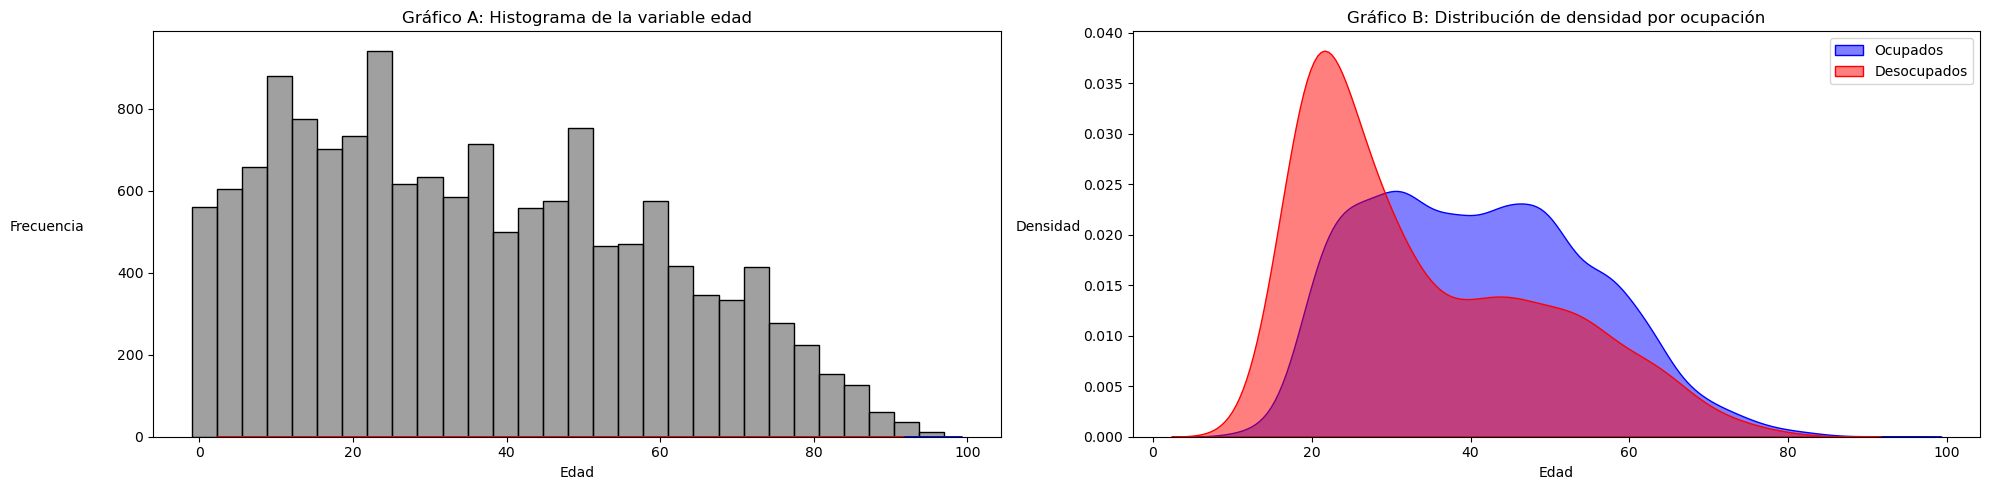

In [655]:
## Parte 1 - Ejercicio 1

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_04['Años al momento de la encuesta'] = df_04['Años al momento de la encuesta'].replace("Menos de 1 año", 0)
df_04['Años al momento de la encuesta'] = pd.to_numeric(df_04['Años al momento de la encuesta'], errors='coerce')  # Codificamos los datos de edad de 2004, de tipo categorica, a tipo numérico
df_04['edad2'] = df_04['Años al momento de la encuesta'] ** 2

df_24['Años al momento de la encuesta'] = df_24['Años al momento de la encuesta'].replace("Menos de 1 año", 0)
df_24['Años al momento de la encuesta'] = pd.to_numeric(df_24['Años al momento de la encuesta'], errors='coerce')  # Codificamos los datos de edad de 2024, de tipo categorical, a tipo numérico
df_24['edad2'] = df_24['Años al momento de la encuesta'] ** 2

# Concatenamos ambas bases
df = pd.concat([df_04, df_24], ignore_index=True)

# Panel A: Histograma
plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['Años al momento de la encuesta'].dropna(), bins=30, kde=False, color='grey')
plt.title("Gráfico A: Histograma de la variable edad")
plt.xlabel("Edad")
plt.ylabel("Frecuencia", rotation=0, labelpad=50)

sns.kdeplot(ocupados.dropna(), label='Ocupados', color='blue', fill=True, alpha=0.5)
sns.kdeplot(desocupados.dropna(), label='Desocupados', color='red', fill=True, alpha=0.5)

# Panel B: Distribución kernel para ocupados y desocupados
plt.subplot(1, 2, 2)

ocupados = df[df['ESTADO'] == "Ocupado"]['Años al momento de la encuesta'] 
desocupados = df[df['ESTADO'] == "Desocupado"]['Años al momento de la encuesta']

sns.kdeplot(ocupados, label='Ocupados', color='blue', fill=True, alpha=0.5)
sns.kdeplot(desocupados, label='Desocupados', color='red', fill=True, alpha=0.5)

plt.title("Gráfico B: Distribución de densidad por ocupación")
plt.xlabel("Edad")
plt.ylabel("Densidad", rotation=0, labelpad=25)
plt.legend()
plt.savefig("graficos_edad2", bbox_inches='tight', dpi=300)
plt.tight_layout()
plt.show()



In [607]:
df_04 = df_04.rename(columns={'ch13': 'CH13'})
df_04 = df_04.rename(columns={'ch12': 'CH12'})
df_04 = df_04.rename(columns={'ch14': 'CH14'})
df_24["CH12"]=df_24["CH12"].replace({1: 'Jardín/preescolar',
2: 'Primario',
3: 'EGB',
4: 'Secundario',
5: 'Polimodal',
6: 'Terciario',
7: 'Universitario',
8: 'Posgrado universitario',
9: 'Educación especial (discapacitado)'
})
df_24["CH14"]= df_24['CH14'].replace({
0: 'Ninguno',
1: 'Primero',
2: 'Segundo',
3: 'Tercero',
4: 'Cuarto',
5: 'Quinto',
6: 'Sexto',
7: 'Séptimo',
8: 'Octavo',
9: 'Noveno',
98: 'Educación especial',
99: 'Ns/Nr'

})


In [663]:
#Agrupamos información para ampliar la base de datos final

df_04 = df_04.rename(columns={'deccfr': 'DECCFR'})
df_04 = df_04.rename(columns={'ideccfr': 'IDECCFR'})
df_04 = df_04.rename(columns={'gdeccfr': 'GDECCFR'})
df_04 = df_04.rename(columns={'rdeccfr': 'RDECCFR'})
df_04 = df_04.rename(columns={'pdeccfr': 'PDECCFR'})
df_04 = df_04.rename(columns={'adeccfr': 'ADECCFR'})
df_04 = df_04.rename(columns={'ano4': 'ANO4'})
df_04 = df_04.rename(columns={'pp3f_tot': 'PP3F_TOT'})
df_04 = df_04.rename(columns={'pp3e_tot': 'PP3E_TOT'})
df_04 = df_04.rename(columns={'p21':"P21"})


import numpy as np
df_2 = df_04.filter([
    "Sexos Relevados", "REGION", "ANO4", "Nivel Educativo", "Estado Civil", "Cobertura Médica",
    "Categoría de Inactividad", "Ingreso Per Cápita Familiar", "Años al momento de la encuesta",
    "Sabe leer y escribir", "Tiene Vacaciones Pagas", "Cobra Aguinaldo", "ESTADO",
    "Trabajó en el último año", "Sin Aguinaldo Ni V.P",
    "DECCFR", "IDECCFR", "RDECCFR", "GDECCFR", "PDECCFR", "ADECCFR", "CH12","CH13","CH14","edad2","PP3F_TOT","PP3E_TOT","P21"])

df_2= df_2.replace(' ', np.nan)
df_2= df_2.replace('', np.nan)
df_2= df_2.replace('  ', np.nan)

df_3 = df_24.filter([
    "Sexos Relevados", "REGION", "ANO4", "Nivel Educativo", "Estado Civil", "Cobertura Médica",
    "Categoría de Inactividad", "Ingreso Per Cápita Familiar", "Años al momento de la encuesta",
    "Sabe leer y escribir", "Tiene Vacaciones Pagas", "Cobra Aguinaldo", "ESTADO",
    "Trabajó en el último año", "Sin Aguinaldo Ni V.P",
    "DECCFR", "IDECCFR", "RDECCFR", "GDECCFR", "PDECCFR", "ADECCFR","CH12","CH13","CH14","edad2","PP3F_TOT","PP3E_TOT","P21"
])

df_3= df_3.replace(' ', np.nan)
df_3= df_3.replace('', np.nan)
df_3= df_3.replace('  ', np.nan)

df_2["DECCFR"] = df_2["DECCFR"].astype(float)
df_2["IDECCFR"] = df_2["IDECCFR"].astype(float)
df_2["RDECCFR"] = df_2["RDECCFR"].astype(float)
df_2["GDECCFR"] = df_2["GDECCFR"].astype(float)
df_2["PDECCFR"] = df_2["PDECCFR"].astype(float)
df_2["ADECCFR"] = df_2["ADECCFR"].astype(float)

df_10=pd.merge(df_2,df_3, how="outer")
df_10= df_10.replace(0.0, np.nan)

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_46664\1004972215.py:25: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_2= df_2.replace('  ', np.nan)


In [664]:
#Parte 1, Ejercicio 2

# La función registra los años de educación según hayan o no terminado cada instancia de su trayecto académico.

#Si alguien llega a un nivel de posgrado universitario, habrá tenido para ese entonces 17 años de educación formal.
def anos_educ(CH12, CH13, CH14):
    ano_por_numero= {
        "Primero": 1,
        "Segundo": 2,
        "Tercero": 3,
        "Cuarto": 4,
        "Quinto": 5,
        "Sexto": 6,
        "Séptimo": 7,
        "Octavo": 8,
        "Noveno": 9
    }
    minimo_ano= {
        "Jardín/preescolar": 0,
        "Primario": 0,
        "EGB": 0,
        "Secundario": 6,
        "Polimodal": 6,  
        "Terciario": 12,  
        "Universitario": 12, 
        "Posgrado universitario": 17,
        "Educación especial (discapacitado)": 0
    }

    if CH13 == "Sí":
        return minimo_ano.get(CH12,0) + {
            "Primario": 6,
            "EGB": 9,
            "Secundario": 6,
            "Polimodal": 6,
            "Terciario": 2,
            "Universitario": 3,
            "Posgrado universitario": 3,
            "Jardín/preescolar": 0,
            "Educación especial (discapacitado)": 0
        }.get(CH12,0)

    
    if CH14 in ano_por_numero:
        return minimo_ano.get(CH12, 0) + ano_por_numero[CH14]

df_10["educ"]= df_10.apply(lambda row: anos_educ(row['CH12'], row['CH13'], row['CH14']), axis=1)

In [665]:
# Realizamos la estadística descriptiva, y creamos un DataFrame aparte para una mejor visualización.

descripcion_educ = df_10['educ'].describe()
df_descripcion_educ = descripcion_educ.to_frame().T
df_descripcion_educ.columns = ['Total observaciones', 'Promedio', 'Desvío Estándar', 'Mín', '25%', '50%', '75%', 'Máx']
df_descripcion_educ['Promedio'] = df_descripcion_educ['Promedio'].round(1)
df_descripcion_educ['Desvío Estándar'] = df_descripcion_educ['Desvío Estándar'].round(1)
df_descripcion_educ
## La variable 'educ' muestra los años de educación formal. Los datos de la estadística arrojan un promedio de 8 años, con un desvío estándar de 11,6. El 50% de las observaciones tuvieron 7 años de educación formal.

,Total observaciones,Promedio,Desvío Estándar,Mín,25%,50%,75%,Máx
educ,9360.0,10.1,4.0,0.0,6.0,12.0,13.0,21.0


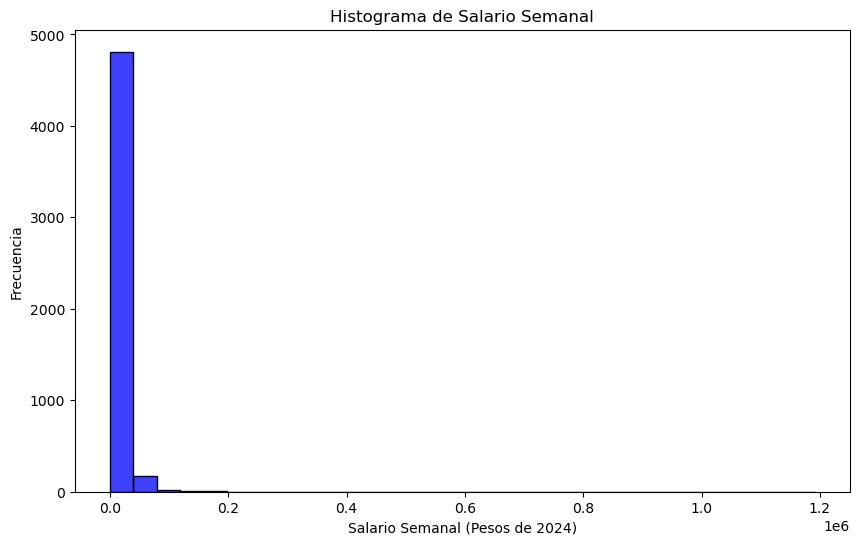

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_46664\502065648.py:23: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_10.loc[df_10['ESTADO'] == 'Ocupado', 'salario_semanal'], label="Ocupados", shade=True, color='green')
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_46664\502065648.py:24: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_10.loc[df_10['ESTADO'] == 'Desocupado', 'salario_semanal'], label="Desocupados", shade=True, color='red')
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_46664\502065648.py:24: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df_10.loc[df_10['ESTADO'] == 'Desocupado', 'salario_semanal'], labe

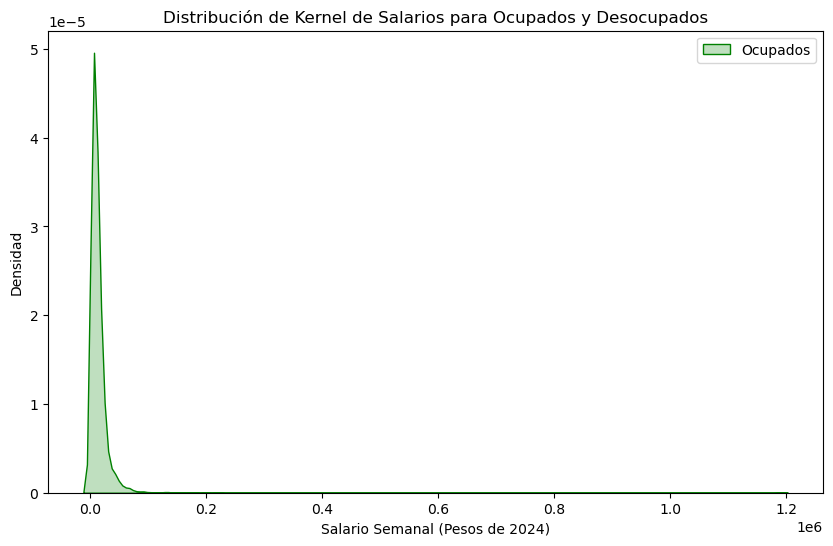

In [672]:
#parte 1, ejercicio 3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Divido ingresos habituales (P21) por 40 para obtener el salario semanal
df_10['salario_semanal'] = df_10['P21'] / 40
df_10.loc[df_10["ANO4"] == 2004, "salario_semanal"] *= 882.22
df_10["P21"]= df_10["P21"].replace(-9.0, np.nan)
#No puee haber valores correspondientes a "salarios negativos"
df_10["salario_semanal"] = df_10["salario_semanal"].where(df_10["salario_semanal"] >= 0, np.nan)

# Creo un histograma de salario_semanal (Panel A)
plt.figure(figsize=(10, 6))
sns.histplot(df_10['salario_semanal'].dropna(), kde=False, bins=30, color='blue')
plt.title("Histograma de Salario Semanal")
plt.xlabel("Salario Semanal (Pesos de 2024)")
plt.ylabel("Frecuencia")
plt.show()

# Creo distribuciones de kernel para ocupados y desocupados (Panel B)
plt.figure(figsize=(10, 6))
sns.kdeplot(df_10.loc[df_10['ESTADO'] == 'Ocupado', 'salario_semanal'], label="Ocupados", shade=True, color='green')
sns.kdeplot(df_10.loc[df_10['ESTADO'] == 'Desocupado', 'salario_semanal'], label="Desocupados", shade=True, color='red')
plt.title("Distribución de Kernel de Salarios para Ocupados y Desocupados")
plt.xlabel("Salario Semanal (Pesos de 2024)")
plt.ylabel("Densidad")
plt.legend()
plt.show()



In [674]:
#Parte 1, Ejercicio 4
#Se deben sumar tanto las horas que trabajó en su ocupación principal como en otras ocupaciones.
#En caso de que haya un NaN en ambas categorías, horas_trab debe ser 0. Si hubiera un NaN en PP3F_TOT, solo se tiene en cuenta para sumar a PP3E_TOT
import pandas as pd
def suma_bien(x, y):
    x = 0 if pd.isna(x) else x
    y = 0 if pd.isna(y) else y
    return x + y

df_10['horas_trab'] = df_10.apply(lambda row: suma_bien(row['PP3E_TOT'], row['PP3F_TOT']), axis=1)

#En una semana habil hay 120 horas. Asumiendo a 120 como máximo de horas que una persona puede trabajar  

df_10.loc[df_10['horas_trab'] > 120, "horas_trab"] = np.nan

In [675]:
#Parte 1,Ejercicio 4
desc_horastrab=df_10["horas_trab"].describe()
df_descripcion_horastrab = desc_horastrab.to_frame().T
df_descripcion_horastrab.columns = ['Total observaciones', 'Promedio', 'Desvío Estándar', 'Mín', '25%', '50%', '75%', 'Máx']
df_descripcion_horastrab


,Total observaciones,Promedio,Desvío Estándar,Mín,25%,50%,75%,Máx
horas_trab,14643.0,15.435157,22.663941,0.0,0.0,0.0,35.0,114.0


In [676]:
#Parte 1, Ejercicio 5

# Base de datos final
df_final=df_10

#Cantidad de observaciones
contar_24 = 2024
contar_ano24 = (df_final["ANO4"] == contar_24).sum()
contar_04 = 2004
contar_ano04 = (df_final["ANO4"] == contar_04).sum()
obs_total = contar_ano24 + contar_ano04

#Cantidad de NaN en la columna "Estado"
nan_2004 = df_final[(df_final["ANO4"] == 2004) & (df_final["ESTADO"].isna())].shape[0]
nan_2024 = df_final[(df_final["ANO4"] == 2024) & (df_final["ESTADO"].isna())].shape[0]
nan_total = nan_2004 + nan_2024

#Número de ocupados
ocupado_04 = df_final[(df_final["ANO4"] == 2004) & (df_final["ESTADO"] == "Ocupado")].shape[0]
ocupado_24 = df_final[(df_final["ANO4"] == 2024) & (df_final["ESTADO"] == "Ocupado")].shape[0]
ocu_total = ocupado_04 + ocupado_24

#Número de desocupados
desocupado_04 = df_final[(df_final["ANO4"] == 2004) & (df_final["ESTADO"] == "Desocupado")].shape[0]
desocupado_24 = df_final[(df_final["ANO4"] == 2024) & (df_final["ESTADO"] == "Desocupado")].shape[0]
desoc_total = desocupado_04 + desocupado_24

#Cantidad de variables limpias y homogeneas
# df_final contiene datos homogeneizados para todas sus variables tanto para 2004 como para 2024
# Por lo tanto, la cantidad de variables limpias y homogeneizadas para ambos años es la misma que la del total de variables en df_final
lim_hom_total = df_final.shape[1]


#Dataframe con los valores de la tabla de resumen
data = [
    [contar_ano04,contar_ano04,obs_total],
    [nan_2004,nan_2024,nan_total],
    [ocupado_04,ocupado_24,ocu_total ],
    [desocupado_04,desocupado_24, desoc_total],
    [lim_hom_total, lim_hom_total, lim_hom_total]
]

columnas = ['2004', '2024', 'Total']
index = ['Cantidad de observaciones', 'Cantidad de observaciones con Nas en la variable "Estado"', 'Cantidad de Ocupados', 
         'Cantidad de Desocupados', 'Cantidad de variables limpias y homogeneizadas']


df_resumen = pd.DataFrame(data, columns=columnas, index=index)
#Con esta información se confecciona la tabla expuesta en el informe
df_resumen


,2004,2024,Total
Cantidad de observaciones,7647,7647,14698
"Cantidad de observaciones con Nas en la variable ""Estado""",0,0,0
Cantidad de Ocupados,3079,3224,6303
Cantidad de Desocupados,528,311,839
Cantidad de variables limpias y homogeneizadas,31,31,31


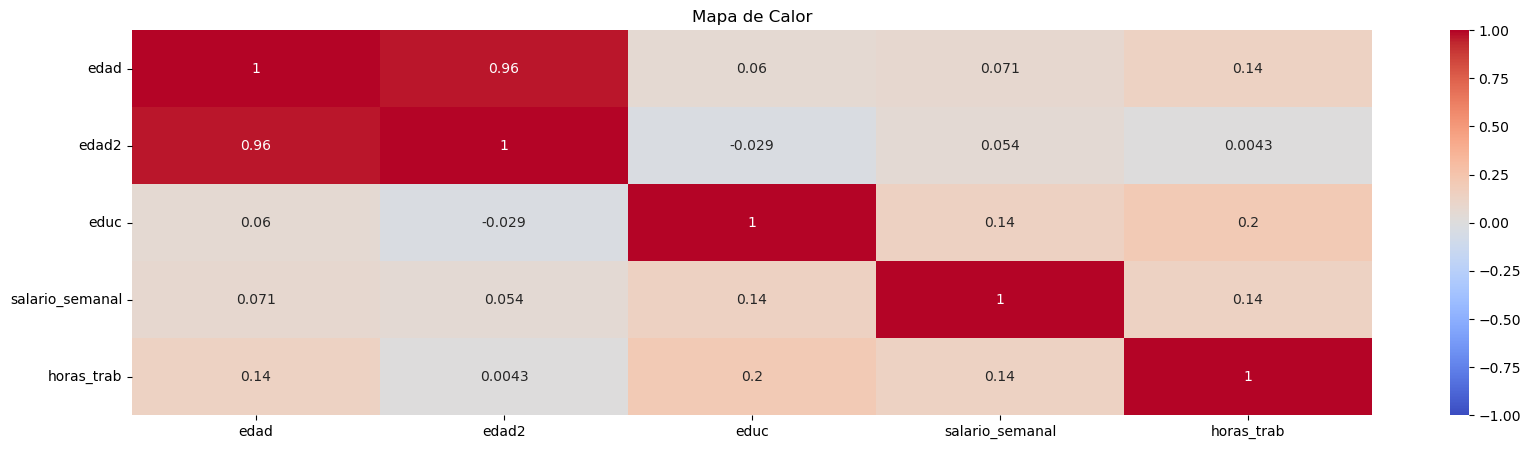

In [677]:
#Parte 2, Ejercicio 1

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df_1=df_final
columnas=["edad","edad2","educ","salario_semanal","horas_trab"]
df_1= df_1.rename(columns={'Años al momento de la encuesta': 'edad'})
grupo_col=df_1[columnas]
corr = grupo_col.corr()

plt.figure(figsize=(20, 5))
sns.heatmap(corr, annot=True, cmap='coolwarm',vmin=-1, vmax=1)
plt.title("Mapa de Calor")
plt.savefig("heatmap_2_1", bbox_inches='tight', dpi=300)
plt.show()
